In [1]:
import ActiveMonomerModule as AMM
from OpenMiChroM.ChromDynamics import MiChroM
import numpy as np

In [34]:
micsim=AMM.ActiveMonomer(time_step=1e-3, collision_rate=10.0, temperature=120.0,
        name="test", active_corr_time=1.0, act_seq=np.zeros(2712),
        outpath='output/', platform="opencl")

# micsim=MiChroM(name='test_int',time_step=0.01)
# micsim.setup(platform="opencl")#, integrator=AMM.PersistentBrownianIntegrator(timestep=1e-5, temperature=120, persistent_time=1.0))

    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.2 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

In [35]:
micsim.saveFolder('output')

# Chrom10 = micsim.create_springSpiral(ChromSeq='./inputs/chr10_beads.txt', isRing=False)
# Chrom10 = micsim.create_springSpiral(ChromSeq='./inputs/10chrseq.txt', isRing=False)
Chrom10=micsim.loadPDB(PDBfiles=['./output/test_int_0_block0.pdb'])
micsim.loadStructure(Chrom10, center=True)
micsim.saveStructure(mode = 'auto')


Chains:  [(0, 2711, 0)]


In [36]:

micsim.addFENEBonds(kfb=30.0)
# AMM.addNLBonds(micsim, kfb=500)

micsim.addAngles(ka=2.0)
micsim.addRepulsiveSoftCore(Ecut=4.0)

micsim.addTypetoType(mu=3.22, rc = 1.78)
# micsim.addIdealChromosome(mu=3.22, rc = 1.78, dinit=3, dend=500)

micsim.addFlatBottomHarmonic( kr=5e-3, n_rad=10.0)

In [37]:
micsim._applyForces()
micsim.forceDict.keys()

Number of exceptions: 2711
adding force  ActiveForce 0
adding force  FENEBond 1
adding force  AngleForce 2
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 3
Add exclusions for TypetoType force
adding force  TypetoType 4
adding force  FlatBottomHarmonic 5
Positions... 
 loaded!
potential energy is 22.214124


dict_keys(['ActiveForce', 'FENEBond', 'AngleForce', 'RepulsiveSoftCore', 'TypetoType', 'FlatBottomHarmonic'])

In [43]:
print(micsim.N)
micsim.state = micsim.context.getState(getPositions=True,getEnergy=True, getForces=True, getVelocities=True)
veli = micsim.state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
forcei=micsim.state.getForces(asNumpy=True)
posi=micsim.state.getPositions(asNumpy=True)

print(veli,posi,forcei)
print(micsim.state.getPotentialEnergy()/micsim.N)

2712
[[ 0.10970185 -0.19333424  0.25292894]
 [ 0.11460591  0.42053416  0.28326887]
 [ 0.14367613 -0.48211157 -0.16721119]
 ...
 [-0.43464434  0.34825233 -0.24998619]
 [ 0.34940383  0.45790842  0.14756438]
 [ 0.07570662 -0.1227172  -0.05834418]] nm/ps [[12.19128513 -2.01001382  2.22894859]
 [12.52663898 -1.07675397  1.73127866]
 [12.71537495 -0.45446751  1.04130733]
 ...
 [ 3.93695927 -5.87342215  0.12627825]
 [ 4.40241909 -5.11870098 -0.09662075]
 [ 3.97783232 -4.28608227 -0.20380156]] nm [[ 22.33936501  61.72199631 -32.46146774]
 [-26.05516815 -67.67240906  41.81381226]
 [ 19.01429749 -30.5179081  -17.36508179]
 ...
 [-39.39321518 -62.73357773   9.15397835]
 [ 39.37593842  31.20220947 -12.434865  ]
 [-10.8721714   19.62906456  -2.64211369]] kJ/(nm mol)
20.61767434089233 kJ/mol


In [44]:

micsim.integrator.step(1)



In [45]:
micsim.state = micsim.context.getState(getPositions=True,getEnergy=True, getForces=True, getVelocities=True)
velf = micsim.state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
forcef=micsim.state.getForces(asNumpy=True)
posf=micsim.state.getPositions(asNumpy=True)

print(velf,posf,forcef)
print(micsim.state.getPotentialEnergy()/micsim.N)

print(micsim.integrator.kT)

[[ 0.1095922  -0.193141    0.25267613]
 [ 0.11449136  0.42011383  0.28298575]
 [ 0.14353253 -0.4816297  -0.16704406]
 ...
 [-0.43420991  0.34790424 -0.24973632]
 [ 0.3490546   0.45745075  0.14741689]
 [ 0.07563096 -0.12259454 -0.05828587]] nm/ps [[12.18957043 -2.01471949  2.24249363]
 [12.52686214 -1.09361064  1.74750102]
 [12.7208786  -0.48611358  1.05269885]
 ...
 [ 3.92035866 -5.87270737  0.13906191]
 [ 4.41171789 -5.0960288  -0.09609292]
 [ 3.9954102  -4.29791069 -0.19780219]] nm [[ 21.69537544  58.82899094 -31.13884354]
 [-26.78057861 -68.57273102  45.05411911]
 [ 13.93460464 -10.96515942 -17.75462723]
 ...
 [-20.43791962 -29.55225945  -7.38799953]
 [ 40.59387207 -64.65264893   6.91961193]
 [-38.49829483  72.35954285  -9.40611458]] kJ/(nm mol)
20.601762709716077 kJ/mol
0.9977355141783886 kJ/mol


In [49]:
bonds=np.mean(np.linalg.norm(posf[1:,:]-posf[:-1,:], axis=1))
fav=np.mean(np.linalg.norm(forcei,axis=1))
print(fav)

44.56912118097344


In [18]:
for _ in range(50):
    micsim.runSimBlock(10, increment=False)

micsim.saveStructure(mode = 'pdb')

Number of exceptions: 2711
adding force  ActiveForce 0
adding force  FENEBond 1
adding force  AngleForce 2
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 3
Add exclusions for TypetoType force
adding force  TypetoType 4
adding force  FlatBottomHarmonic 5
Positions... 
 loaded!
potential energy is 22.208109
bl=0 pos[1]=[10.5 -5.3 2.9] eK=1.5333766880991888, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[11.8 -2.7 2.0] eK=1.4878519333920999, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[12.4 -2.0 2.1] eK=1.4955717103671184, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[12.3 -2.0 2.1] eK=1.4970117079473175, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[7.8 -22.8 3.8] eK=1.481396880473359, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[12.7 -1.2 1.7] eK=1.4974420148011154, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[-5.4 -47.2 5.5] eK=1.4784740346722898, eP=nan, trying one more time at step 0 
bl=0 pos[1]=[12.2 -2.4 2.5] 

KeyboardInterrupt: 

In [6]:
micsim.forceDict.keys()

dict_keys(['FENEBond'])

In [ ]:
micsim.N
micsim.state = micsim.context.getState(getPositions=True,getEnergy=True, getForces=True, getVelocities=True)
veli = micsim.state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
forcei=micsim.state.getForces(asNumpy=True)
posi=micsim.state.getPositions(asNumpy=True)

print(veli,posi,forcei)
print(micsim.state.getPotentialEnergy()/micsim.N)

In [17]:
np.mean(np.linalg.norm(posi[1:]-posi[:-1], axis=1))

0.9709071576829801

In [ ]:
micsim.removeFlatBottomharmonic()

In [ ]:
for _ in range(500):
    micsim.runSimBlock(100, increment=True) #perform 1 block of the simulation

micsim.saveStructure(mode = 'pdb')

In [12]:
sim=AMM.ActiveMonomer(time_step=1e-5, collision_rate=0.1, temperature=120.0,
        name="test", active_corr_time=1.0, act_seq=np.zeros(10),
        outpath='output/', platform="opencl")

    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.2 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

In [13]:
# Chrom10 = sim.create_springSpiral(ChromSeq='./inputs/10chrseq.txt', isRing=False)
Chrom10=sim.loadPDB(PDBfiles=['./output/test_int_0_block0.pdb'])
print(Chrom10.shape)

Chains:  [(0, 2711, 0)]
(2712, 3)


In [14]:
sim.loadStructure(Chrom10, center=True)

In [15]:
sim.addFENEBonds(kfb=30.0)
# AMM.addNLBonds(sim, kfb=50)
sim.addAngles(ka=2.0)
sim.addRepulsiveSoftCore(Ecut=4.0)

sim.addTypetoType(mu=3.22, rc = 1.78)
sim.addIdealChromosome(mu=3.22, rc = 1.78, dinit=3, dend=500)

sim.addFlatBottomHarmonic( kr=5e-3, n_rad=10.0)

In [13]:
sim._applyForces()

Number of exceptions: 9
adding force  ActiveForce 0
adding force  NLBond 1
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 2
Add exclusions for TypetoType force
adding force  TypetoType 3
adding force  FlatBottomHarmonic 4
Positions... 
 loaded!
potential energy is 1.129271


In [14]:
sim.state = sim.context.getState(getPositions=True,getEnergy=True, getForces=True, getVelocities=True)
veli = sim.state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
forcei=sim.state.getForces(asNumpy=True)
posi=sim.state.getPositions(asNumpy=True)

print(veli,posi,forcei)
print(sim.state.getPotentialEnergy()/sim.N)

[[-0.39316165  0.32137281 -0.45901629]
 [ 0.12032376 -0.55920929  0.45770285]
 [-0.56422275  0.17755438  0.61881423]
 [-0.47043914 -0.37230593  0.29535344]
 [-0.10663323 -0.45203409 -0.00459053]
 [ 0.20230743  0.11976825  0.38849646]
 [ 0.12808192  0.08423617 -0.47339043]
 [-0.26949808  0.42709732  0.32531589]
 [-0.31029192  0.0648133   0.17022416]
 [ 0.21775159 -0.60088497  0.65866381]] nm/ps [[ 1.27425742 -1.13632369  0.37277904]
 [ 1.58691823 -0.19770241  0.22704759]
 [ 1.27426255  0.74092352  0.08134104]
 [ 0.4837724   1.29000843 -0.04680696]
 [-0.42733783  1.2609067  -0.14191093]
 [-1.08995175  0.74157733 -0.19252175]
 [-1.30319118  0.01139416 -0.19252604]
 [-1.0903585  -0.63093442 -0.14191502]
 [-0.62167019 -1.00487149 -0.04681335]
 [-0.08666919 -1.07497823  0.08133747]] nm [[ -0.46199548   0.41049704  -0.15953031]
 [ -0.61929607   0.13560532  -0.09426676]
 [  0.68275893  -1.12872815   0.18992235]
 [  2.73873162   0.39728898   0.26149091]
 [  2.19968867   4.00903702   0.0910579 ]

In [18]:
sim.integrator.step(1)
sim.integrator.getTemperature()

Quantity(value=120.00000000000001, unit=kelvin)

In [19]:
sim.state = sim.context.getState(getPositions=True,getEnergy=True, getForces=True, getVelocities=True)
velf = sim.state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
forcef=sim.state.getForces(asNumpy=True)
posf=sim.state.getPositions(asNumpy=True)

print(velf,posf,forcef)
print(sim.state.getPotentialEnergy()/sim.N)

# dif=np.linalg.norm(posf-posi,axis=1)
# print(posf-posi)

[[-0.3923761   0.32073072 -0.45809919]
 [ 0.12008335 -0.558092    0.45678836]
 [-0.56309545  0.17719962  0.61757779]
 [-0.46949917 -0.37156206  0.2947633 ]
 [-0.10642017 -0.45113093 -0.00458135]
 [ 0.20190322  0.11952895  0.38772026]
 [ 0.12782601  0.08406787 -0.47244456]
 [-0.26895964  0.42624396  0.3246659 ]
 [-0.30967194  0.0646838   0.16988404]
 [ 0.21731652 -0.59968442  0.6573478 ]] nm/ps [[ 0.97953284 -0.79583055  0.3667278 ]
 [ 1.56337976 -0.00617982  0.05395188]
 [ 1.17898858  0.43321985 -0.13770373]
 [ 0.45663458  1.40855682 -0.26086438]
 [-0.46885648  1.06819582 -0.31768996]
 [-1.30775177  0.72536385 -0.11764055]
 [-0.95754433 -0.05005051  0.34313437]
 [-1.42743683 -0.44085562 -0.40114456]
 [-0.812199   -1.09912944  0.11480728]
 [ 0.10567337 -0.84113532  0.17568107]] nm [[  1.36257923   1.37521172  -0.3387953 ]
 [ 10.53172398 -14.80732441   6.42723131]
 [-19.34423637  22.32069969  -7.03958511]
 [  6.88575649  -9.24610901   1.3120544 ]
 [  2.90609694   0.18596452  -0.6494171 ]

In [17]:
Positions=[]
Velocities=[]
for _ in range(100):
    sim.runSimBlock(100, increment=True)
    state = sim.context.getState(getPositions=True,getForces=True,
            getVelocities=True, getEnergy=False)
    vel = state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
    force=state.getForces(asNumpy=True)
    pos=state.getPositions(asNumpy=True)
    # print(force,vel, pos)
    Velocities.append(vel)
    Positions.append(pos)

Positions=np.array(Positions)
Velocities=np.array(Velocities)

bl=11 pos[1]=[12.2 -2.0 2.5] dr=0.19 t=0.0ps kin=1.46 pot=20.01 Rg=9.537 SPS=197 
bl=12 pos[1]=[12.3 -2.2 2.3] dr=0.19 t=0.0ps kin=1.46 pot=20.03 Rg=9.537 SPS=294 
bl=13 pos[1]=[12.3 -2.2 2.3] dr=0.19 t=0.0ps kin=1.46 pot=20.01 Rg=9.535 SPS=298 
bl=14 pos[1]=[12.5 -2.1 2.7] dr=0.19 t=0.0ps kin=1.45 pot=20.03 Rg=9.538 SPS=302 
bl=15 pos[1]=[12.3 -2.0 2.6] dr=0.19 t=0.0ps kin=1.45 pot=20.02 Rg=9.539 SPS=302 
bl=16 pos[1]=[12.1 -1.7 2.6] dr=0.19 t=0.0ps kin=1.45 pot=19.99 Rg=9.539 SPS=300 
bl=17 pos[1]=[12.2 -1.9 2.7] dr=0.19 t=0.0ps kin=1.45 pot=20.00 Rg=9.534 SPS=303 
bl=18 pos[1]=[12.4 -1.9 2.7] dr=0.19 t=0.0ps kin=1.44 pot=20.01 Rg=9.535 SPS=299 
bl=19 pos[1]=[12.4 -1.8 2.8] dr=0.19 t=0.0ps kin=1.44 pot=20.03 Rg=9.535 SPS=302 
bl=20 pos[1]=[12.4 -1.9 2.8] dr=0.19 t=0.0ps kin=1.44 pot=20.00 Rg=9.533 SPS=303 
bl=21 pos[1]=[12.5 -1.8 2.7] dr=0.19 t=0.0ps kin=1.43 pot=20.06 Rg=9.527 SPS=294 
bl=22 pos[1]=[12.3 -1.8 2.8] dr=0.19 t=0.0ps kin=1.43 pot=20.00 Rg=9.527 SPS=302 
bl=23 pos[1]=[12

In [16]:
sim.forceDict.keys()

dict_keys(['ActiveForce', 'NLBond', 'AngleForce', 'RepulsiveSoftCore', 'TypetoType', 'IdealChromosome', 'FlatBottomHarmonic'])

In [17]:
def _autocorrFFT(x):
        N=len(x)
        F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        res = np.fft.ifft(PSD)
        res= (res[:N]).real   #now we have the autocorrelation in convention B
        n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
        return res/n #this is the autocorrelation in convention A

def _msd_fft(r):
    #r is an (T,3) ndarray: [time stamps,dof]
    N=len(r)
    D=np.square(r).sum(axis=1)
    D=np.append(D,0)
    S2=sum([ _autocorrFFT(r[:, i]) for i in range(r.shape[1])])
    Q=2*D.sum()
    S1=np.zeros(N)
    for m in range(N):
        Q=Q-D[m-1]-D[N-m]
        S1[m]=Q/(N-m)
    return S1, S2

In [18]:
msd=[]
for p in range(Positions.shape[1]):
    s1,s2 = _msd_fft(Positions[:,p,:])
    # Pos_autocorr.append(2*S2/S1)
    msd.append(s1-2*s2)

msd=np.array(msd)
# Pos_autocorr=np.array(Pos_autocorr)

#average over all particles
msd_av=np.mean(msd,axis=0)

In [19]:
import matplotlib.pyplot as plt

(1, 100000.0)

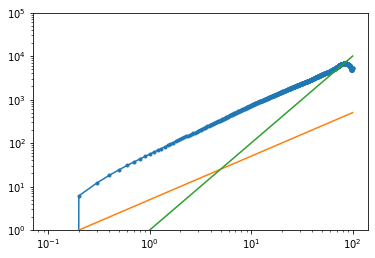

In [20]:
ts=np.arange(1,len(msd_av)+1,1)*0.001*100
plt.plot(ts, msd_av,'.-')
plt.loglog([0,100], 5*np.array([0,100]))
plt.loglog([1,100], np.array([1,100])**2)
plt.ylim(1,1e5)

/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(0.001, 2)

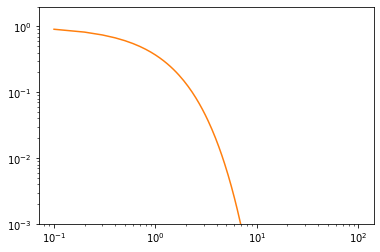

In [21]:
corr=[]
for p in range(Velocities.shape[1]):
    s1,s2 = _msd_fft(Velocities[:,p,:])
    # Pos_autocorr.append(2*S2/S1)
    corr.append(2*s2/s1)

corr=np.array(corr)
# Pos_autocorr=np.array(Pos_autocorr)

#average over all particles
corr_av=np.mean(corr,axis=0)


plt.loglog(ts, corr_av,'.')
plt.loglog(ts,np.exp(-ts))
plt.ylim(1e-3,2)

In [ ]:
print(Positions)

[[[-0.09963844  0.48503911  0.85878438]
  [-0.93995714  0.16494466  1.08742094]]

 [[-1.45103502 -1.13024354  2.64610696]
  [-0.40987158  2.05301476  0.78479499]]

 [[ 0.65801215 -1.34704769  3.31465244]
  [ 0.27658051  0.13392256  0.25594124]]

 [[-0.94370216 -0.90841603  4.26900911]
  [-0.16673514 -1.33306813 -2.59681845]]

 [[ 0.04852555  1.0308938   4.69286013]
  [ 1.93814504 -1.11801875 -4.1868825 ]]]


In [20]:
a=[1,2,34]
a.remove(23)
print(a)

ValueError: list.remove(x): x not in list

In [56]:
4e3*1e5/(3000*3600)

37.03703703703704

In [74]:
a=np.arange(0,10,1).reshape(1,-1)
b=np.arange(1,11,1).reshape(-1,1)

print(a, b, a+b)

[[0 1 2 3 4 5 6 7 8 9]] [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]
